In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import files
uploaded = files.upload()


Saving high_diamond_ranked_10min.csv to high_diamond_ranked_10min.csv


In [4]:
lol = pd.read_csv('high_diamond_ranked_10min.csv')

In [5]:
lol.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [6]:
#check for nan
lol.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

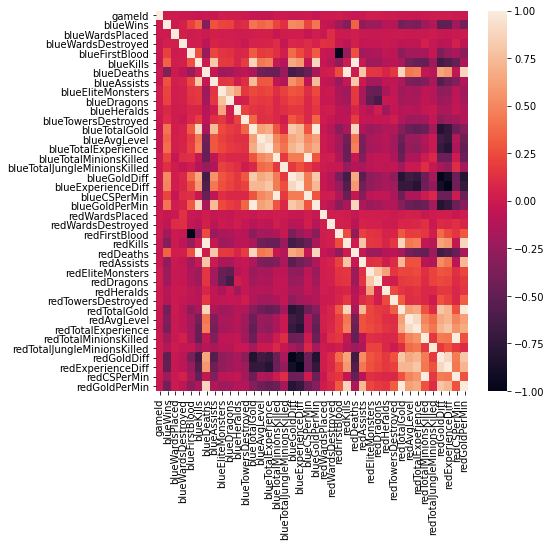

In [8]:
#heatmap to see correlated features
corr = lol.corr()
plt.figure(figsize = (7,7))
sns.heatmap(corr, xticklabels=lol.columns, yticklabels=lol.columns, annot=False)


In [9]:
#break down into ind and dep variables
y = lol['blueWins'].copy()
X = lol.drop('blueWins', axis=1)

In [10]:
#feature selection, will utilize sklearn. selectkbest selects features with highest k score computed via ANOVA-F value.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
order_rank_feat = SelectKBest(score_func=f_classif, k='all')
ord_feat = order_rank_feat.fit(X,y)


In [ ]:
ord_feat.scores_

array([9.58546851e-03, 7.46749850e-05, 1.93749212e+01, 4.19165506e+02,
       1.26846740e+03, 1.28499421e+03, 8.18813391e+02, 5.11741353e+02,
       4.72958173e+02, 8.50252617e+01, 1.33698965e+02, 2.08158726e+03,
       1.45029007e+03, 1.83848060e+03, 5.26240327e+02, 1.73652824e+02,
       3.49274924e+03, 3.11336001e+03, 5.26240327e+02, 2.08158726e+03,
       5.53745773e+00, 3.04077582e+01, 4.19165506e+02, 1.28499421e+03,
       1.26846740e+03, 7.83164231e+02, 5.09836679e+02, 4.53476007e+02,
       9.41513439e+01, 1.07359651e+02, 2.01221193e+03, 1.39802737e+03,
       1.74606466e+03, 4.65589565e+02, 1.23198110e+02, 3.49274924e+03,
       3.11336001e+03, 4.65589565e+02, 2.01221193e+03])

In [11]:
features = pd.DataFrame(ord_feat.scores_, index=X.columns, columns = ['Scores']).sort_values(by='Scores',ascending = False)

In [12]:
features.head(11)

,Scores
redGoldDiff,3492.749236
blueGoldDiff,3492.749236
redExperienceDiff,3113.360011
blueExperienceDiff,3113.360011
blueGoldPerMin,2081.587263
blueTotalGold,2081.587263
redTotalGold,2012.211934
redGoldPerMin,2012.211934
blueTotalExperience,1838.480597
redTotalExperience,1746.064665


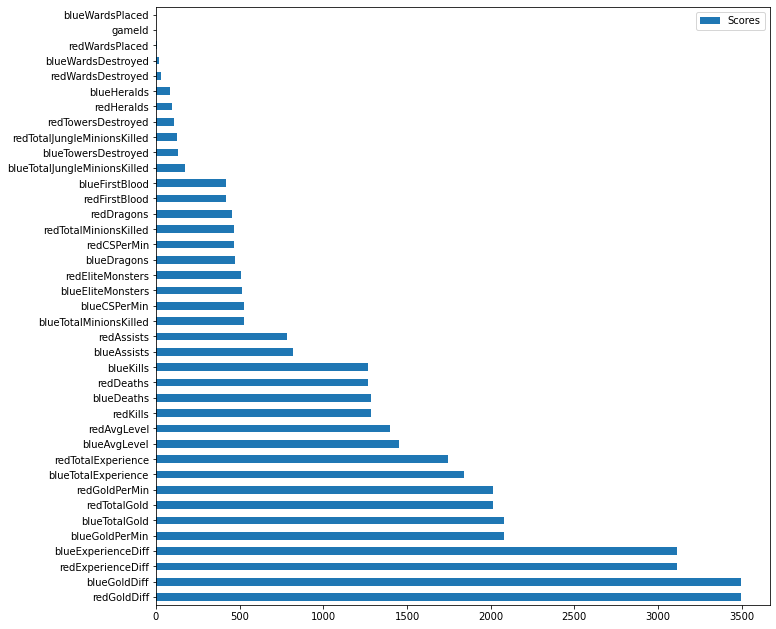

In [13]:
features.plot(kind='barh', figsize=(11,11))

In [15]:
best_features_list = ['blueGoldDiff','blueExperienceDiff','blueAvgLevel','redAvgLevel','redKills','blueKills','blueAssists','redAssists','blueCSPerMin','redCSPerMin','blueFirstBlood','blueEliteMonsters','redEliteMonsters','blueDragons','redDragons']
new_X = X[best_features_list]

In [17]:
def preprocess_input(X,y):
    X = X.copy()
    # Train test split
    X_train,X_test,y_train,y_test =   train_test_split(X,y,train_size=0.8,random_state=42)
    # Scale the data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test = preprocess_input(new_X,y)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier


In [19]:
models = {
   'Logistic Regression': LogisticRegression(max_iter=1000),
   'Support Vector Machine (Linear Kernel)': LinearSVC(),
   'Support Vector Machine (RBF Kernel)': SVC(),
   'Adaboost': AdaBoostClassifier(),
   'Random Forest': RandomForestClassifier(),
   'Gradient Boosting Classifier': GradientBoostingClassifier()}
for name, model in models.items():
   model.fit(X_train,y_train)
   print(name + ' trained')

Logistic Regression trained


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Support Vector Machine (Linear Kernel) trained
Support Vector Machine (RBF Kernel) trained
Adaboost trained
Random Forest trained
Gradient Boosting Classifier trained


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [45]:
for name,model in models.items():
   print(f'Accuracy Score for {name}:   {accuracy_score(y_test,model.predict(X_test))}')
   print(f'Precision Score for {name}: {precision_score(y_test,model.predict(X_test))}')
   print(f'Recall Score for {name}: {recall_score(y_test,model.predict(X_test))}')
   print(f'F1 Score for {name}: {f1_score(y_test,model.predict(X_test))}')
  


Accuracy Score for Logistic Regression:   0.7338056680161943
Precision Score for Logistic Regression: 0.7332667332667333
Recall Score for Logistic Regression: 0.7391742195367573
F1 Score for Logistic Regression: 0.736208625877633
Accuracy Score for Support Vector Machine (Linear Kernel):   0.7338056680161943
Precision Score for Support Vector Machine (Linear Kernel): 0.7342026078234705
Recall Score for Support Vector Machine (Linear Kernel): 0.7371601208459214
F1 Score for Support Vector Machine (Linear Kernel): 0.7356783919597989
Accuracy Score for Support Vector Machine (RBF Kernel):   0.7257085020242915
Precision Score for Support Vector Machine (RBF Kernel): 0.7284701114488349
Recall Score for Support Vector Machine (RBF Kernel): 0.7240684793554885
F1 Score for Support Vector Machine (RBF Kernel): 0.7262626262626263
Accuracy Score for Adaboost:   0.7327935222672065
Precision Score for Adaboost: 0.7365208545269583
Recall Score for Adaboost: 0.729103726082578
F1 Score for Adaboost: 0

In [46]:
scores_list = []
for name,model in models.items():
  scores_list.append({
'Model': name,
'Accuracy': accuracy_score(y_test,model.predict(X_test)),
'Precision':  precision_score(y_test,model.predict(X_test)),
'Recall': recall_score(y_test,model.predict(X_test)),
'F1-Score': f1_score(y_test,model.predict(X_test))
})
scores = pd.DataFrame(scores_list)


In [47]:
print(scores)

                                    Model  Accuracy  ...    Recall  F1-Score
0                     Logistic Regression  0.733806  ...  0.739174  0.736209
1  Support Vector Machine (Linear Kernel)  0.733806  ...  0.737160  0.735678
2     Support Vector Machine (RBF Kernel)  0.725709  ...  0.724068  0.726263
3                                Adaboost  0.732794  ...  0.729104  0.732794
4                           Random Forest  0.724696  ...  0.705942  0.720452
5            Gradient Boosting Classifier  0.727227  ...  0.721047  0.726535

[6 rows x 5 columns]


this guided project can be found at: https://medium.com/swlh/league-of-legends-win-prediction-5f5516c4b1d7

The things I learned: 1) feature selection using SelectKBest

2) how to train various models at once in a loop

